<a href="https://colab.research.google.com/github/wmazza-br/wmazza-br/blob/main/Job_07_Desmatamento_Amaz%C3%B4nia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red' style='font-size: 30px;'>Desmatamento na Amazônia Legal</font>
<hr style='border: 2px solid red;'>

###<font color='red' style='font-size: 30px;'>Qual o % de desmatamento da Amazônia ocorrido em cada governo desde o ano 2000? Seria o atual governo o maior destruidor de florestas? É essa pergunta que quero responder, baseado nos fatos e dados.</font>

##<font color='blue' style='font-size: 30px;'>Sobre a base de dados</font>

###fonte: Instituto Nacional de Pesquisas Espaciais (INPE)

###extraído de https://basedosdados.org/dataset/br-inpe-prodes

O projeto PRODES realiza o monitoramento por satélites do desmatamento por corte raso na Amazônia Legal e produz, desde 1988, as taxas anuais de desmatamento na região, que são usadas pelo governo brasileiro para o estabelecimento de políticas públicas. As taxas anuais são estimadas a partir dos incrementos de desmatamento identificados em cada imagem de satélite que cobre a Amazônia Legal. A primeira apresentação dos dados é realizada para dezembro de cada ano, na forma de estimativa. Os dados consolidados são apresentados no primeiro semestre do ano seguinte.

O PRODES utiliza imagens de satélites da classe LANDSAT (20 a 30 metros de resolução espacial e taxa de revisita de 16 dias) numa combinação que busca minimizar o problema da cobertura de nuvens e garantir critérios de interoperabilidade. As imagens do satélite americano LANDSAT-5/TM foram, historicamente, as mais utilizadas pelo projeto, mas as imagens do sensor CCD a bordo do CBERS-2/2B, satélites do programa sino-brasileiro de sensoriamento remoto, foram bastante usadas. O PRODES também fez uso de imagens LISS-3 do satélite indiano IRS-1 e também das imagens do satélite inglês UK-DMC2. Atualmente faz uso massivo das imagens do LANDSAT 8/OLI, CBERS 4 e IRS-2. Independente do instrumento utilizado, a área mínima mapeada pelo PRODES é de 6,25 hectares.

As estimativas do PRODES são consideradas confiáveis pelos cientistas nacionais e internacionais (Kintish, 2007). Esse sistema tem demonstrado ser de grande importância para ações e planejamento de políticas públicas da Amazônia. Resultados recentes, a partir de análises realizadas com especialistas independentes, indicam nível de precisão próximo a 95%.

###<font color='red' style='font-size: 30px;'>Qual o % de desmatamento da Amazônia ocorrido em cada governo desde o ano 2000? Seria o atual governo o maior destruidor de florestas? É essa pergunta que quero responder, baseado nos fatos e dados.</font>

##<font color='blue' style='font-size: 30px;'>Importando a base de dados</font>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio próprio/desmatamento_municipio.csv')

##<font color='blue' style='font-size: 30px;'>Conhecendo o dataset</font>

In [ ]:
dados.head()

,ano,id_municipio,area,desmatado,incremento,floresta,nuvem,nao_observado,nao_floresta,hidrografia
0,2000,1100015,7137,1761.1,NaN,3639.6,0.0,6.1,1708.0,22.2
1,2001,1100015,7137,1834.2,73.1,3566.5,0.0,6.1,1708.0,22.2
2,2002,1100015,7137,1948.9,114.7,3451.8,0.0,6.1,1708.0,22.2
3,2003,1100015,7137,2014.9,66.0,3385.8,0.0,6.1,1708.0,22.2
4,2004,1100015,7137,2092.0,77.1,3308.7,0.0,6.1,1708.0,22.2


In [ ]:
dados.shape

(15960, 10)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15960 entries, 0 to 15959
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ano            15960 non-null  int64  
 1   id_municipio   15960 non-null  int64  
 2   area           15960 non-null  int64  
 3   desmatado      15960 non-null  float64
 4   incremento     15200 non-null  float64
 5   floresta       15960 non-null  float64
 6   nuvem          15960 non-null  float64
 7   nao_observado  15960 non-null  float64
 8   nao_floresta   15960 non-null  float64
 9   hidrografia    15960 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.2 MB


##<font color='blue' style='font-size: 30px;'>Acrescentando a coluna "% desmatado"</font>

In [ ]:
dados['% desmatado'] = dados['desmatado'] / dados['area'] * 100
dados

,ano,id_municipio,area,desmatado,incremento,floresta,nuvem,nao_observado,nao_floresta,hidrografia,% desmatado
0,2000,1100015,7137,1761.1,NaN,3639.6,0.0,6.1,1708.0,22.2,24.675634
1,2001,1100015,7137,1834.2,73.1,3566.5,0.0,6.1,1708.0,22.2,25.699874
2,2002,1100015,7137,1948.9,114.7,3451.8,0.0,6.1,1708.0,22.2,27.306992
3,2003,1100015,7137,2014.9,66.0,3385.8,0.0,6.1,1708.0,22.2,28.231750
4,2004,1100015,7137,2092.0,77.1,3308.7,0.0,6.1,1708.0,22.2,29.312036
...,...,...,...,...,...,...,...,...,...,...,...
15955,2016,5108956,5277,2393.4,18.4,2864.0,0.0,0.0,12.9,6.7,45.355316
15956,2017,5108956,5277,2414.3,21.0,2843.1,0.0,0.0,12.9,6.7,45.751374
15957,2018,5108956,5277,2428.2,17.3,2829.2,0.0,0.0,12.9,6.7,46.014781
15958,2019,5108956,5277,2468.2,40.0,2789.2,0.0,0.0,12.9,6.7,46.772788


##<font color='blue' style='font-size: 30px;'>Conhecendo os dados por ano</font>

In [ ]:
grupo_ano = dados.groupby('ano')

In [ ]:
df = pd.DataFrame(columns=['Ano','Área desmatada'])

for ano, data in grupo_ano:
    print('{} -> {}'.format(ano, data.desmatado.sum()))
    df = df.append({'Ano': ano,'Área desmatada': data.desmatado.sum()},ignore_index=True)
   

2000 -> 532920.5
2001 -> 587431.6
2002 -> 613144.6000000001
2003 -> 643523.7
2004 -> 670690.2
2005 -> 694580.0
2006 -> 705478.5
2007 -> 716979.2
2008 -> 730279.8999999999
2009 -> 736830.7
2010 -> 743164.3
2011 -> 748774.0
2012 -> 753228.2
2013 -> 758637.2
2014 -> 763760.7999999999
2015 -> 769905.1000000001
2016 -> 777170.8
2017 -> 780968.2
2018 -> 791854.5
2019 -> 802898.3
2020 -> 813485.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             21 non-null     float64
 1   Área desmatada  21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


##<font color='blue' style='font-size: 30px;'>Hora de plotar os gráficos</font>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


###<font color='blue' style='font-size: 30px;'>Primeiro, por área desmatada</font>

(500000.0, 820000.0)

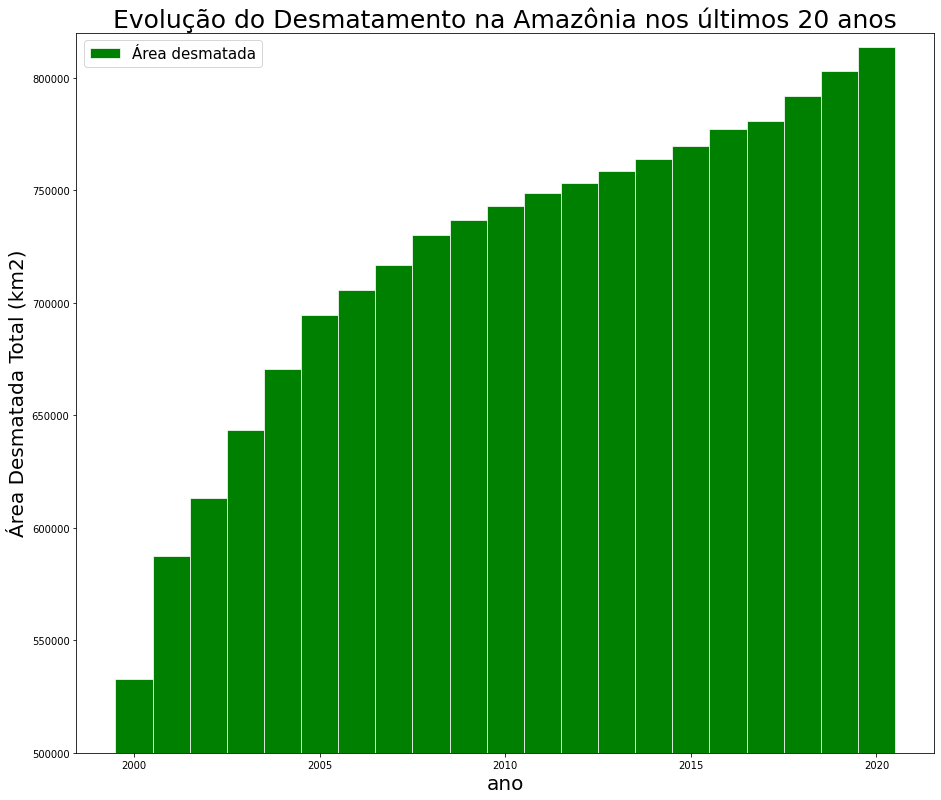

In [ ]:
fig = plt.figure(figsize=(11.91,10)) #proporção recomendada pelo Linkedin
eixo = fig.add_axes([0, 0, 1, 1])
eixo.bar(df['Ano'], df['Área desmatada'], color = 'green', width=1, edgecolor="white", linewidth=0.7)

eixo.set_title('Evolução do Desmatamento na Amazônia nos últimos 20 anos', fontsize=25)
eixo.set_ylabel('Área Desmatada Total (km2)', fontsize=20)
eixo.set_xlabel('ano', fontsize=20)
eixo.legend(['Área desmatada'], loc = 'upper left', fontsize=15)
eixo.set_ylim([500000, 820000])


###<font color='blue' style='font-size: 30px;'>Depois, por % de área desmatada</font>

In [ ]:
df = pd.DataFrame(columns=['Ano','% Área desmatada'])

for ano, data in grupo_ano:
    print('{} -> {}'.format(ano, data['% desmatado'].mean()))
    df = df.append({'Ano': ano,'% Área desmatada': data['% desmatado'].mean()},ignore_index=True)

2000 -> 27.85855087953522
2001 -> 31.973784435372913
2002 -> 32.7563053581227
2003 -> 33.600462626382814
2004 -> 34.23949602663731
2005 -> 34.87015599749638
2006 -> 35.13216472177302
2007 -> 35.36511058530883
2008 -> 35.71418246078029
2009 -> 35.90246450157756
2010 -> 36.056886564462445
2011 -> 36.178335015945855
2012 -> 36.27385755480967
2013 -> 36.38188231003261
2014 -> 36.4852715193571
2015 -> 36.60098335133249
2016 -> 36.72443181843238
2017 -> 36.724047231265125
2018 -> 36.991173816499085
2019 -> 37.16545062508115
2020 -> 37.32568868243272


In [ ]:
df['Ano'] = pd.to_numeric(df['Ano'], downcast='integer')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ano               21 non-null     int16  
 1   % Área desmatada  21 non-null     float64
dtypes: float64(1), int16(1)
memory usage: 338.0 bytes


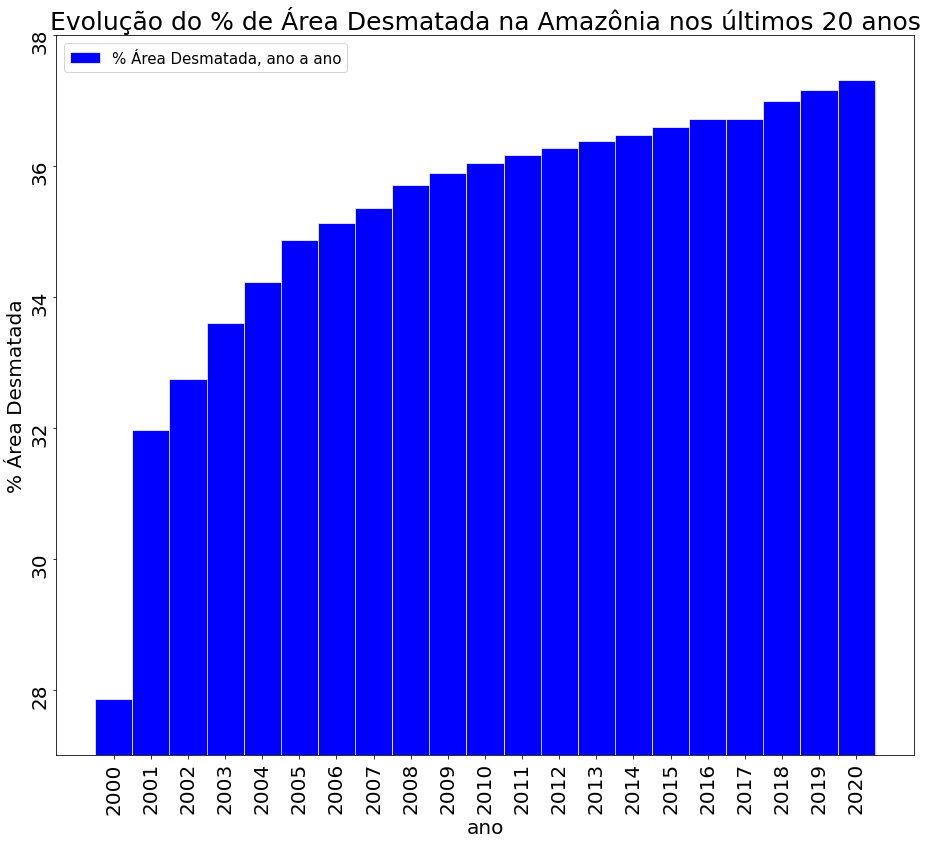

In [ ]:
fig = plt.figure(figsize=(11.91,10)) #proporção recomendada pelo Linkedin
eixo = fig.add_axes([0, 0, 1, 1])
eixo.bar(df['Ano'], df['% Área desmatada'], color = 'b', width=1, edgecolor="white", linewidth=0.7,tick_label=df['Ano'])

eixo.set_title('Evolução do % de Área Desmatada na Amazônia nos últimos 20 anos', fontsize=25)
eixo.set_ylabel('% Área Desmatada', fontsize=20)
eixo.set_xlabel('ano', fontsize=20)
eixo.legend(['% Área Desmatada, ano a ano'], loc = 'upper left', fontsize=15)
eixo.set_ylim([27, 38])
eixo.tick_params(axis='both', which='major', labelsize=20,rotation=90)


In [ ]:
desmatamento_fhc = (33.6 - 27.85)/27.85 * 100
desmatamento_lula = (36.17 - 33.6)/33.6 * 100
desmatamento_dilma = (36.72 - 36.17)/36.17 * 100
desmatamento_temer = (37.16 - 36.72)/36.72 * 100
desmatamento_bolsonaro = (37.33 - 37.16)/37.16 * 100

##<font color='blue' style='font-size: 30px;'>Por fim, atribuindo os percentuais, por governo</font>

In [ ]:
print("As 'contribuições' de cada presidente no aumento do % de área desmatada na Amazônia Legal:\n",
      "\nFHC: ", round(desmatamento_fhc,2), 
      "%\nLULA: ", round(desmatamento_lula,2), 
      "%\nDILMA: ",round(desmatamento_dilma,2),
      "%\nTEMER: ",round(desmatamento_temer,2), 
      "%\nBOLSONARO: ",round(desmatamento_bolsonaro,2),"%")

As 'contribuições' de cada presidente no aumento do % de área desmatada na Amazônia Legal:
 
FHC:  20.65 %
LULA:  7.65 %
DILMA:  1.52 %
TEMER:  1.2 %
BOLSONARO:  0.46 %


##<font color='blue' style='font-size: 30px;'>Conclusão: os dados mostram que a cada governo que passa, o % de desmatamento amazônico diminui, ao contrário daquilo que a mídia propaga.</font>